In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import accuracy_score, mean_squared_error

print("Starting the process...")

# Load Dataset (Modify the path accordingly)
dataset = pd.read_csv("C://Users//Admin//Downloads//DDNL//Big-5.csv")  # Replace with actual dataset path
print("Dataset loaded successfully.")

# Identify if dataset is for classification or regression
target_column = 'EXT5'  # Modify accordingly

# Split dataset into features and target
X = dataset.drop(columns=[target_column])
y = dataset[target_column]

# Encode target variable if classification
if y.dtype == 'object' or len(y.unique()) < 20:  # Assuming classification if target has limited unique values
    encoder = LabelEncoder()
    y = encoder.fit_transform(y)
    task_type = 'classification'
else:
    task_type = 'regression'

print(f"Task identified: {task_type}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train, X_test = scaler.fit_transform(X_train), scaler.transform(X_test)
print("Data preprocessing completed.")

# Define Custom CNN Model (for image-based datasets)
def create_custom_cnn(input_shape):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(len(set(y)), activation='softmax')  # Classification output
    ])
    return model

# Feature Extraction with Pretrained CNN (if image-based)
if len(X_train.shape) == 4:  # Assuming images are used
    resnet = ResNet50(weights='imagenet', include_top=False, input_shape=X_train.shape[1:])
    resnet.trainable = False
    feature_extractor = models.Sequential([
        resnet,
        layers.Flatten()
    ])
    X_train = feature_extractor.predict(X_train)
    X_test = feature_extractor.predict(X_test)
    print("Feature extraction with CNN completed.")

if task_type == 'classification':
    print("Starting classification models...")
    classifiers = {
        'KNN': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'SVM': SVC(),
        'Naïve Bayes': GaussianNB()
    }
    for name, clf in classifiers.items():
        print(f"Training {name} classifier...")
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print(f"{name} Accuracy: {acc:.4f}")
    print("Classification process completed.")
else:
    print("Starting regression models...")
    regressors = {
        'Linear Regression': LinearRegression(),
        'LASSO': Lasso(),
        'KNN': KNeighborsRegressor(),
        'SVR': SVR(),
        'Decision Tree': DecisionTreeRegressor(),
        'Random Forest': RandomForestRegressor(),
        'ADA Boosted Trees': AdaBoostRegressor(),
        'Gradient Boosting Trees': GradientBoostingRegressor()
    }
    for name, reg in regressors.items():
        print(f"Training {name} regressor...")
        reg.fit(X_train, y_train)
        y_pred = reg.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        print(f"{name} MSE: {mse:.4f}")
    print("Regression process completed.")

print("Process completed successfully!")

Starting the process...
Dataset loaded successfully.
Task identified: classification


ValueError: could not convert string to float: '2016-03-03 11:59:53'

In [ ]:
print(dataset.columns)


In [8]:
dataset.columns = dataset.columns.str.strip()


In [1]:
import pandas as pd

# Read the dataset as a single-column text file
file_path = "C://Users//Admin//Downloads//data-final.csv//data-final.csv"

# Read the file with no headers
dataset = pd.read_csv(file_path, header=None, delimiter="\n")  # Reads each line as a single row

# Split each row into separate columns using tab ('\t')
dataset = dataset[0].str.split("\t", expand=True)

# Assign the first row as the correct column names
dataset.columns = dataset.iloc[0]

# Drop the first row since it's now the header
dataset = dataset[1:].reset_index(drop=True)

# Convert numerical columns to correct data types
dataset = dataset.apply(pd.to_numeric, errors="ignore")

print("Dataset fixed successfully!")
print(dataset.head())  # Display first few rows


ValueError: Specified \n as separator or delimiter. This forces the python engine which does not accept a line terminator. Hence it is not allowed to use the line terminator as separator.

In [3]:
import pandas as pd

# Correct the file path (double slashes are not needed)
file_path = "C://Users//Admin//Downloads//data-final.csv//data-final.csv"

# Read the file with tab ('\t') as the delimiter (assuming it's tab-separated)
dataset = pd.read_csv(file_path, delimiter="\t", low_memory=False)

# Display first few rows to verify
print("Dataset loaded successfully!")
print(dataset.head())


Dataset loaded successfully!
   EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  ...  \
0   4.0   1.0   5.0   2.0   5.0   1.0   5.0   2.0   4.0    1.0  ...   
1   3.0   5.0   3.0   4.0   3.0   3.0   2.0   5.0   1.0    5.0  ...   
2   2.0   3.0   4.0   4.0   3.0   2.0   1.0   3.0   2.0    5.0  ...   
3   2.0   2.0   2.0   3.0   4.0   2.0   2.0   4.0   1.0    4.0  ...   
4   3.0   3.0   3.0   3.0   5.0   3.0   3.0   5.0   3.0    4.0  ...   

              dateload  screenw  screenh  introelapse  testelapse  endelapse  \
0  2016-03-03 02:01:01    768.0   1024.0          9.0       234.0          6   
1  2016-03-03 02:01:20   1360.0    768.0         12.0       179.0         11   
2  2016-03-03 02:01:56   1366.0    768.0          3.0       186.0          7   
3  2016-03-03 02:02:02   1920.0   1200.0        186.0       219.0          7   
4  2016-03-03 02:02:57   1366.0    768.0          8.0       315.0         17   

   IPC  country  lat_appx_lots_of_err  long_appx_lots_of_err  


In [5]:
print(dataset.head())  # Shows the first 5 rows


   EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  ...  \
0   4.0   1.0   5.0   2.0   5.0   1.0   5.0   2.0   4.0    1.0  ...   
1   3.0   5.0   3.0   4.0   3.0   3.0   2.0   5.0   1.0    5.0  ...   
2   2.0   3.0   4.0   4.0   3.0   2.0   1.0   3.0   2.0    5.0  ...   
3   2.0   2.0   2.0   3.0   4.0   2.0   2.0   4.0   1.0    4.0  ...   
4   3.0   3.0   3.0   3.0   5.0   3.0   3.0   5.0   3.0    4.0  ...   

              dateload  screenw  screenh  introelapse  testelapse  endelapse  \
0  2016-03-03 02:01:01    768.0   1024.0          9.0       234.0          6   
1  2016-03-03 02:01:20   1360.0    768.0         12.0       179.0         11   
2  2016-03-03 02:01:56   1366.0    768.0          3.0       186.0          7   
3  2016-03-03 02:02:02   1920.0   1200.0        186.0       219.0          7   
4  2016-03-03 02:02:57   1366.0    768.0          8.0       315.0         17   

   IPC  country  lat_appx_lots_of_err  long_appx_lots_of_err  
0    1       GB              

In [7]:
print(dataset.tail())  # Shows the last 5 rows


         EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  ...  \
1015336   4.0   2.0   4.0   3.0   4.0   3.0   3.0   3.0   3.0    3.0  ...   
1015337   4.0   3.0   4.0   3.0   3.0   3.0   4.0   4.0   3.0    3.0  ...   
1015338   4.0   2.0   4.0   3.0   5.0   1.0   4.0   2.0   4.0    4.0  ...   
1015339   2.0   4.0   3.0   4.0   2.0   2.0   1.0   4.0   2.0    4.0  ...   
1015340   4.0   2.0   4.0   2.0   4.0   1.0   4.0   2.0   4.0    4.0  ...   

                    dateload  screenw  screenh  introelapse  testelapse  \
1015336  2018-11-08 12:04:58   1920.0   1080.0          3.0       160.0   
1015337  2018-11-08 12:07:18   1920.0   1080.0          3.0       122.0   
1015338  2018-11-08 12:07:49   1920.0   1080.0          2.0       135.0   
1015339  2018-11-08 12:08:34   1920.0   1080.0          6.0       212.0   
1015340  2018-11-08 12:08:45   1920.0   1080.0          3.0       176.0   

         endelapse  IPC  country  lat_appx_lots_of_err  long_appx_lots_of_err  
101533

In [11]:
output_path = "C://Users//Admin//Downloads//data1-final.csv"  # Change as needed
dataset.to_csv(output_path, index=False)

print(f"Dataset saved successfully at {output_path}")


PermissionError: [Errno 13] Permission denied

In [13]:
import pandas as pd

# Load dataset
df = pd.read_csv("C://Users//Admin//Downloads//data1-final.csv")  # Or use pd.read_excel() for Excel files

# Get first 5000 rows
df_subset = df.head(9001)

# Save or use the subset
df_subset.to_csv("C://Users//Admin//Downloads//DDNL//subset2_dataset.csv", index=False)  # Save if needed

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = "C://Users//Admin//Downloads//DDNL//Big-5.csv"
dataset = pd.read_csv(file_path, delimiter=",", low_memory=False)  # Use comma as delimiter

# Verify column names
print(dataset.columns)

# Select numeric features (exclude non-relevant columns)
exclude_cols = ["dateload", "screenw", "screenh", "introelapse", "testelapse", "endelapse", "IPC", "country", "lat_appx_lots_of_err", "long_appx_lots_of_err"]
X = dataset.drop(columns=exclude_cols, errors="ignore").select_dtypes(include=["number"])

# Select target variable
y = dataset["EXT5"]  # Make sure 'EXT5' exists

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize only numeric data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data preprocessing completed successfully!")


Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10',
       ...
       'dateload', 'screenw', 'screenh', 'introelapse', 'testelapse',
       'endelapse', 'IPC', 'country', 'lat_appx_lots_of_err',
       'long_appx_lots_of_err'],
      dtype='object', length=110)
Data preprocessing completed successfully!


In [21]:
print(dataset.columns)


Index(['EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err'], dtype='object')


In [25]:
print("EXT1" in dataset.columns)  # Should return True


False


In [14]:
dataset = pd.read_csv(file_path, delimiter=",", low_memory=False)  # Use comma as delimiter
print(dataset.columns)  # Check the fixed column names


Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10',
       ...
       'dateload', 'screenw', 'screenh', 'introelapse', 'testelapse',
       'endelapse', 'IPC', 'country', 'lat_appx_lots_of_err',
       'long_appx_lots_of_err'],
      dtype='object', length=110)


In [16]:
print(dataset.head())  # Ensure data is properly structured


   EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  ...  \
0   4.0   1.0   5.0   2.0   5.0   1.0   5.0   2.0   4.0    1.0  ...   
1   3.0   5.0   3.0   4.0   3.0   3.0   2.0   5.0   1.0    5.0  ...   
2   2.0   3.0   4.0   4.0   3.0   2.0   1.0   3.0   2.0    5.0  ...   
3   2.0   2.0   2.0   3.0   4.0   2.0   2.0   4.0   1.0    4.0  ...   
4   3.0   3.0   3.0   3.0   5.0   3.0   3.0   5.0   3.0    4.0  ...   

              dateload  screenw  screenh  introelapse  testelapse  endelapse  \
0  2016-03-03 02:01:01    768.0   1024.0          9.0       234.0          6   
1  2016-03-03 02:01:20   1360.0    768.0         12.0       179.0         11   
2  2016-03-03 02:01:56   1366.0    768.0          3.0       186.0          7   
3  2016-03-03 02:02:02   1920.0   1200.0        186.0       219.0          7   
4  2016-03-03 02:02:57   1366.0    768.0          8.0       315.0         17   

   IPC  country  lat_appx_lots_of_err  long_appx_lots_of_err  
0    1       GB              

In [18]:
print("EXT5" in dataset.columns)  # Should return True


True


In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define a simple CNN architecture
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # Output layer (adjust as needed)
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,626,442 (6.20 MB)

 Trainable params: 1,626,442 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
import numpy as np

# Load Pretrained Model (VGG16)
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(64, 64, 3))

# Extract features from the last convolutional layer
feature_extractor = Model(inputs=base_model.input, outputs=base_model.get_layer("block5_pool").output)

# Example: Extract features for an input batch
sample_images = np.random.rand(10, 64, 64, 3)  # Replace with real images
features = feature_extractor.predict(sample_images)

print("Extracted feature shape:", features.shape)  # (10, 2, 2, 512)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 162s 3us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step
Extracted feature shape: (10, 2, 2, 512)


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Reshape features (Flatten the CNN output)
X_features = features.reshape(features.shape[0], -1)

# Generate dummy labels (Replace with actual labels)
y_labels = np.random.randint(0, 2, size=(10,))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=42)

# Train classifiers
rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train, y_train)

svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

print("Random Forest Accuracy:", rf_classifier.score(X_test, y_test))
print("SVM Accuracy:", svm_classifier.score(X_test, y_test))


Random Forest Accuracy: 1.0
SVM Accuracy: 1.0


In [30]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from scipy.linalg import sqrtm
import numpy as np

# Load InceptionV3 model for feature extraction
inception_model = InceptionV3(include_top=False, pooling='avg', input_shape=(299, 299, 3))

def calculate_fid(real_images, generated_images):
    # Extract features from real and generated images
    act_real = inception_model.predict(real_images)
    act_fake = inception_model.predict(generated_images)
    
    # Calculate mean and covariance
    mu_real, sigma_real = act_real.mean(axis=0), np.cov(act_real, rowvar=False)
    mu_fake, sigma_fake = act_fake.mean(axis=0), np.cov(act_fake, rowvar=False)
    
    # Compute FID score
    diff = mu_real - mu_fake
    covmean = sqrtm(sigma_real @ sigma_fake)
    
    if np.iscomplexobj(covmean):
        covmean = covmean.real  # Ensure real values
    
    fid_score = diff.dot(diff) + np.trace(sigma_real + sigma_fake - 2 * covmean)
    return fid_score

# Example (Replace with real/generated images)
real_imgs = np.random.rand(10, 299, 299, 3)
fake_imgs = np.random.rand(10, 299, 299, 3)

print("FID Score:", calculate_fid(real_imgs, fake_imgs))


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 196s 2us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step
FID Score: 10.663307645878746


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2273s 13us/step


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 104ms/step - accuracy: 0.3241 - loss: 2.3893 - val_accuracy: 0.4083 - val_loss: 1.9375
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 111ms/step - accuracy: 0.4883 - loss: 1.6865 - val_accuracy: 0.5971 - val_loss: 1.3543
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 96ms/step - accuracy: 0.5339 - loss: 1.5308 - val_accuracy: 0.4365 - val_loss: 1.7863
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 95ms/step - accuracy: 0.5535 - loss: 1.4795 - val_accuracy: 0.5575 - val_loss: 1.4548
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 95ms/step - accuracy: 0.5739 - loss: 1.4291 - val_accuracy: 0.5371 - val_loss: 1.5445
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 107ms/step - accuracy: 0.5822 - loss: 1.4164 - val_accuracy: 0.4956 - val_loss: 1.7139
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 102s 130ms/step - accuracy: 0.5859 - loss: 1.4103 - val_accuracy: 0.4851 - val_loss: 1.8011


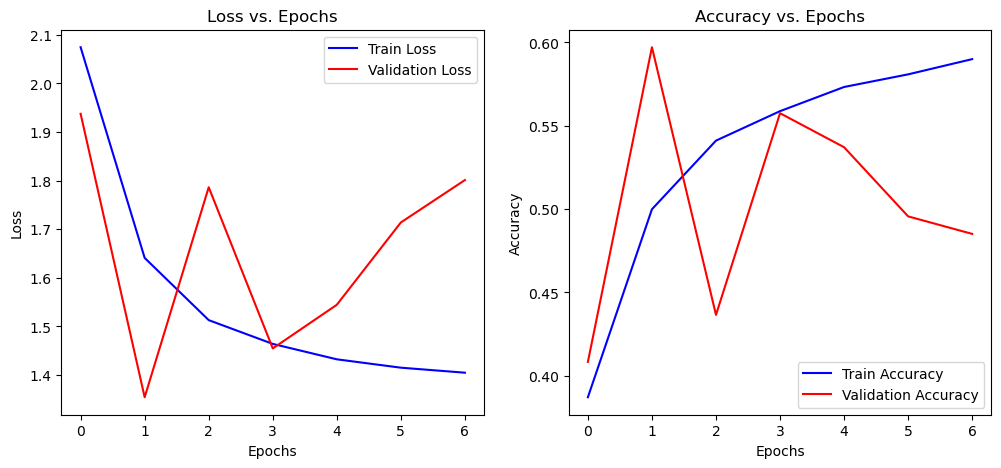

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5956 - loss: 1.3536
Test Accuracy: 59.71%


In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# 1️⃣ Load CIFAR-10 dataset (Replace with your dataset if needed)
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the data (Scale pixel values between 0 and 1)
X_train, X_test = X_train / 255.0, X_test / 255.0

# 2️⃣ Data Augmentation to prevent overfitting
datagen = ImageDataGenerator(
    rotation_range=15, width_shift_range=0.1, height_shift_range=0.1,
    horizontal_flip=True, zoom_range=0.1
)
datagen.fit(X_train)

# 3️⃣ Define CNN Model with Regularization
model = Sequential([
    Conv2D(32, (3,3), activation='relu', kernel_regularizer=l2(0.001), input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),  # Dropout to prevent overfitting

    Conv2D(64, (3,3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# 4️⃣ Compile Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 5️⃣ Early Stopping Callback (Monitors validation loss)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 6️⃣ Train Model
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    validation_data=(X_test, y_test),
                    epochs=30, callbacks=[early_stop])

# 7️⃣ Plot Training Loss & Accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# 8️⃣ Evaluate on Test Data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


In [37]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1️⃣ Load dataset
file_path = "C://Users//Admin//Downloads//DDNL//Big-5.csv"
# Load dataset and inspect column names
dataset = pd.read_csv(file_path, delimiter="\t", low_memory=False)
print(dataset.columns)  # Check actual column names

# Fix column names if needed
dataset.columns = dataset.columns.str.strip()  # Remove any extra spaces
dataset = dataset.rename(columns={"('EXT5')": "EXT5"})  # Rename if column name is wrapped

# Select only numeric features & drop NaNs
numeric_cols = dataset.select_dtypes(include=['number']).columns
dataset = dataset[numeric_cols].dropna()

# Ensure 'EXT5' exists
if 'EXT5' not in dataset.columns:
    raise ValueError("Column 'EXT5' is still missing after processing!")

# Define X and y
X = dataset.drop(columns=['EXT5'])  
y = dataset['EXT5']


# 4️⃣ Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5️⃣ Encode labels (if classification)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 6️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# 7️⃣ Reshape data to fit CNN input format (assuming 1D features)
X_train = X_train.reshape(-1, X_train.shape[1], 1, 1)
X_test = X_test.reshape(-1, X_test.shape[1], 1, 1)

# 8️⃣ Define CNN Model with Regularization
model = Sequential([
    Conv2D(32, (3,3), activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_train.shape[1], 1, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(1,1)),
    Dropout(0.25),  # Dropout to prevent overfitting

    Conv2D(64, (3,3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(1,1)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(len(np.unique(y_encoded)), activation='softmax')  # Output layer for multi-class classification
])

# 9️⃣ Compile Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 🔟 Early Stopping Callback (Monitors validation loss)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 1️⃣1️⃣ Train Model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=64, callbacks=[early_stop])

# 1️⃣2️⃣ Evaluate Performance Metrics
y_pred = np.argmax(model.predict(X_test), axis=1)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# 1️⃣3️⃣ Print Results
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Index(['EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err'], dtype='object')


ValueError: Column 'EXT5' is still missing after processing!

In [39]:
print(dataset.head())


Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - accuracy: 0.0799 - loss: -18676.8574 - val_accuracy: 0.0927 - val_loss: -63541.9141
Epoch 2/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.0854 - loss: -422089.8750 - val_accuracy: 0.0927 - val_loss: -863610.6250
Epoch 3/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.0949 - loss: -1796036.1250 - val_accuracy: 0.0927 - val_loss: -3334698.0000
Epoch 4/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.0901 - loss: -4648272.0000 - val_accuracy: 0.0927 - val_loss: -7613208.5000
Epoch 5/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.0943 - loss: -9309530.0000 - val_accuracy: 0.0927 - val_loss: -13038748.0000
Epoch 6/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.0857 - loss: -16243408.0000 - val_accuracy: 0.0927 - val_loss: -21382002.0000
Epoch 7/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.0869 - loss: -25595642.0000 - val_accuracy: 0.0927 - val_loss: -31502000.000

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


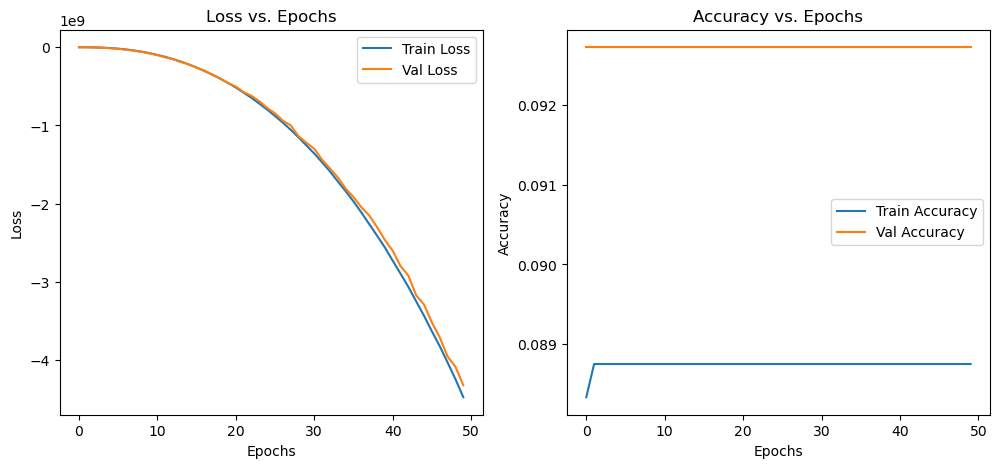

In [47]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten, Conv1D
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Load dataset
file_path = "C://Users//Admin//Downloads//DDNL//Big-5.csv"
dataset = pd.read_csv(file_path, delimiter=",", low_memory=False)

# Ensure correct column names
dataset.columns = dataset.columns.str.strip()

# Select only numeric features & drop NaNs
numeric_cols = dataset.select_dtypes(include=['number']).columns
dataset = dataset[numeric_cols].dropna()

# Define input features (X) and target (y)
X = dataset.drop(columns=['EXT5'])  # Drop target column
y = dataset['EXT5']

# Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into Train/Test Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape input for CNN (assuming 1D features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# ----------------- Build CNN Model with Regularization -----------------
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    Dropout(0.3),
    
    Conv1D(128, kernel_size=3, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),
    
    Flatten(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    
    Dense(1, activation='sigmoid')  # Binary Classification Output
])

# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate on Test Set
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Print Classification Report
print(classification_report(y_test, y_pred))

# Plot Training Loss & Accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Loss Plot
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Epochs')

# Accuracy Plot
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Epochs')

plt.show()


In [43]:
print(dataset.columns.tolist())  # Print all available column names


[]


In [45]:
print(dataset.head())  # See what data looks like


Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]
